In [1]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
# Генерируем уникальный seed
my_code = "Sattorov"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [4]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [5]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [7]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [8]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [9]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [10]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [11]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.623423,0.653105,0.661355,0.646617,0.592294,0.923164,Perch
1,0.07111,0.216274,0.223108,0.242481,0.254588,0.332938,Roach
2,0.435135,0.45182,0.462151,0.520677,0.766725,0.614973,Bream
3,0.479069,0.760171,0.760956,0.759398,0.345449,0.641425,Pike
4,0.356681,0.471092,0.482072,0.539474,0.777782,0.6701,Bream
...,...,...,...,...,...,...,...
90,0.003452,0.059957,0.063745,0.056391,0.031842,0.030853,Smelt
91,0.165255,0.316916,0.332669,0.347744,0.372462,0.474341,Whitefish
92,0.121321,0.27409,0.272908,0.300752,0.329011,0.456365,Roach
93,0.184083,0.340471,0.348606,0.336466,0.382771,0.606052,Perch


In [12]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [13]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Length2', 'Length3', 'Width']
Length1


In [14]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [15]:
x_train

,Length2,Length3,Width
0,0.661355,0.646617,0.923164
1,0.223108,0.242481,0.332938
2,0.462151,0.520677,0.614973
3,0.760956,0.759398,0.641425
4,0.482072,0.539474,0.6701
...,...,...,...
90,0.063745,0.056391,0.030853
91,0.332669,0.347744,0.474341
92,0.272908,0.300752,0.456365
93,0.348606,0.336466,0.606052


In [17]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
r_model1 = DecisionTreeRegressor(criterion='mse')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='mae', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [20]:
r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)

In [23]:
# Обучаем модели
for model in r_models:
    model.fit(x_train, y_train)

In [26]:
# Оцениваем качество работы моделей на валидационной выборке
mses = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mses.append(mse)
    print(mse)

0.0006743233267152401
0.03590290657659154
0.03472822448633356
0.00035034435482761634


In [35]:
# Выбираем лучшую модель
i_min = mses.index(min(mses))
best_r_model = r_models[i_min]
best_r_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
# Вычислим ощибку лучшей модели на тестовой выборке
test_pred = best_r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.00029718371857361046


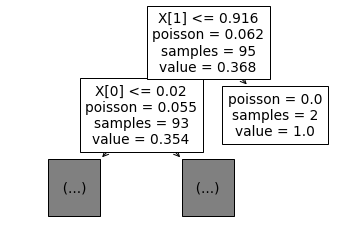

In [37]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_r_model, max_depth=1)
plt.show()

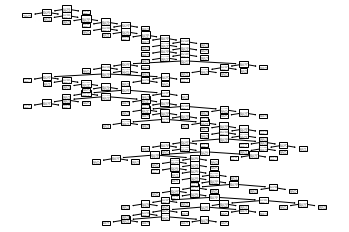

In [38]:
plot_tree(best_r_model)
plt.show()

In [39]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [40]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Height', 'Weight']
Species


In [41]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [42]:
x_train

,Height,Weight
0,0.592294,0.623423
1,0.254588,0.07111
2,0.766725,0.435135
3,0.345449,0.479069
4,0.777782,0.356681
...,...,...
90,0.031842,0.003452
91,0.372462,0.165255
92,0.329011,0.121321
93,0.382771,0.184083


In [54]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
c_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
c_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)
c_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
c_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [55]:
c_models = []
c_models.append(c_model1)
c_models.append(c_model2)
c_models.append(c_model3)
c_models.append(c_model4)

In [56]:
# Обучаем модели
for model in c_models:
    model.fit(x_train, y_train)

In [57]:
# Оцениваем качество работы моделей на валидационной выборке
f1s =[]
for model in c_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1s.append(f1)
    print(f1)

0.6307971014492754
0.6634943181818183
0.6589556277056278
0.6276785714285713


In [58]:
# Выбираем лучшую модель
i_min = f1s.index(max(f1s))
best_c_model = c_models[i_min]
best_c_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [61]:
# Вычислим ошибку лучшей модели на тестовой выборке
test_pred = best_c_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average ='weighted')
print(f1)

0.7942460317460316


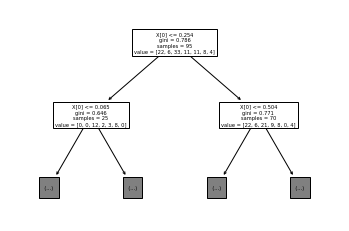

In [62]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_c_model, max_depth=1)
plt.show()

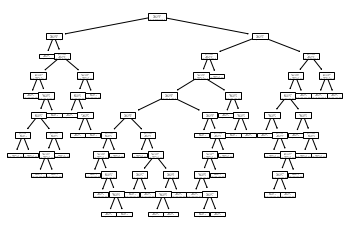

In [63]:
plot_tree(best_c_model)
plt.show()